## Geopandas Examples

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import fiona

%matplotlib inline

## Read a shapefile

In [2]:
# In NAD83
shp_path = os.path.join(os.environ["DATA_DIR"], 'us_states', 'tl_2014_us_state.shp')

states_df = gpd.read_file(shp_path)
states_df.head(20)

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266581604,489443020,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138903200855,31407883551,+28.4574302,-082.4091478,"MULTIPOLYGON (((-82.98339 24.60263, -82.98624 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143794747023,6200927458,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206236605303,18924324242,+46.3161343,-094.1994801,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25147575220,6983455225,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677751247,1323482672,+41.5974187,-071.5272723,"MULTIPOLYGON (((-71.67264 41.13429, -71.67609 ..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214045425549,2397728105,+44.3020993,-114.5956279,"POLYGON ((-116.89971 44.84061, -116.89967 44.8..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23187964254,1026252314,+43.6726907,-071.5843145,"POLYGON ((-72.32962 43.60020, -72.32851 43.600..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125917995955,13472722504,+35.5397100,-079.1308636,"POLYGON ((-82.41671 36.07278, -82.41669 36.072..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23871896411,1034369068,+44.0604795,-072.6733273,"POLYGON ((-73.31328 44.26413, -73.31274 44.265..."


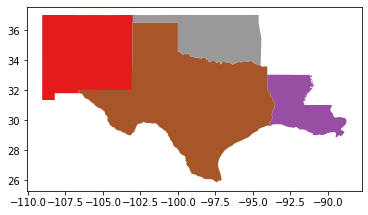

In [6]:
states_df[states_df.STUSPS.isin(['TX', 'OK', 'NM', 'LA'])].plot(cmap="Set1")

## Examine Metadata

In [11]:
states_df.head(5).geom_type

0         Polygon
1    MultiPolygon
2         Polygon
3         Polygon
4         Polygon
dtype: object

In [12]:
states_df.crs

{'init': 'epsg:4269'}

## Transformations/Reprojections

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


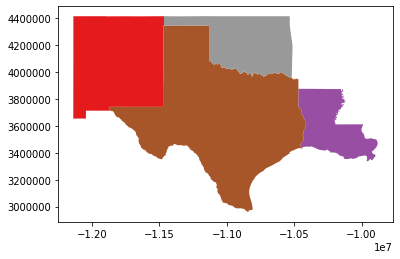

In [5]:
# Mercator: https://spatialreference.org/ref/epsg/3395/
#merc = states_df.to_crs({'init': 'epsg:3395'})
merc = states_df[states_df.STUSPS.isin(['TX', 'OK', 'NM', 'LA'])].to_crs(epsg=3395)

merc.plot(cmap="Set1")

## Spatial Join

In [ ]:
# In NAD27: EPSG:4267
shp_path2 = os.path.join(os.environ["DATA_DIR"], 'roads', 'roads.shp')

roads_df = gpd.read_file(shp_path2)
roads_df.head()

## Standardize to WGS84, EPSG:4326

In [ ]:
states_wgs84_df = states_df.loc[:, ['STATEFP', 'STUSPS', 'NAME', 'geometry']].copy().to_crs(epsg=4326)
roads_wgs84_df = roads_df.copy().to_crs(epsg=4326)

In [12]:
roads_states_df = gpd.sjoin(roads_wgs84_df, states_wgs84_df, how='inner', op='within')

In [ ]:
roads_states_df.head()

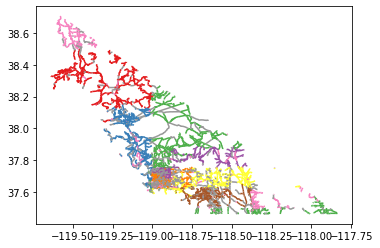

In [13]:
roads_states_df.plot(cmap="Set1")

## Overlaps Example via Spatial Join

In [13]:
%%time

# In WGS84: EPSG:4326
layers = ['Counties_US_WGS84', 'NM_township']

gdb_path = os.path.join(os.environ["DATA_DIR"], 'landgrid', 'DI_basemaps_WGS84.gdb')

counties_df = gpd.read_file(gdb_path, layer='Counties_US_WGS84')
nm_twp_df = gpd.read_file(gdb_path, layer='NM_township')

# pre-generate sindex if it doesn't already exist
nm_twp_df.sindex

CPU times: user 6.06 s, sys: 51.5 ms, total: 6.11 s
Wall time: 6.1 s


In [14]:
%%time

ovlaps_df = gpd.sjoin(nm_twp_df, counties_df, how='inner', op='intersects')

CPU times: user 1.51 s, sys: 60 µs, total: 1.51 s
Wall time: 1.51 s


### Implement String Aggregation using Pandas
- [Reference](https://stackoverflow.com/questions/17841149/pandas-groupby-how-to-get-a-union-of-strings)

In [8]:
%%time

ovlaps_agg_df = ovlaps_df.loc[:, ['TWPCODE', 'TWPLabel', 'County_Name']].copy()

# ovlaps_join_df = (ovlaps_agg_df
#                   .groupby('TWPLabel', sort=False)
#                   .filter(lambda x: len(x['County_Name']) > 2)  # like HAVING
#                   .groupby('TWPLabel', sort=False)
#                   .aggregate({'TWPCODE': 'first',
#                               'County_Name': ','.join})
#                  )

#Pandas 0.25.0
ovlaps_join_df = (ovlaps_agg_df
                  .groupby('TWPLabel', sort=False)
                  .filter(lambda x: len(x['County_Name']) > 2)  # like HAVING
                  .groupby('TWPLabel', sort=False)
                  .aggregate(TWPCODE=('TWPCODE', 'first'),
                             County_Count=('County_Name', 'size'),
                             County_Overlaps=('County_Name', ','.join)))

ovlaps_join_df.reset_index()

CPU times: user 914 ms, sys: 12.5 ms, total: 926 ms
Wall time: 904 ms


,TWPLabel,TWPCODE,County_Count,County_Overlaps
0,T9N R21W,3023T00900NR02100W,3,"McKinley,Apache,Cibola"
1,T13N R5W,3023T01300NR00500W,3,"McKinley,Cibola,Sandoval"
2,T20N R8W,3023T02000NR00800W,3,"McKinley,Sandoval,San Juan"
3,T21N R7W,3023T02100NR00700W,3,"McKinley,Sandoval,San Juan"
4,T21N R8W,3023T02100NR00800W,3,"McKinley,Sandoval,San Juan"
...,...,...,...,...
92,T21N R13E,3023T02100NR01300E,3,"Mora,Rio Arriba,Taos"
93,T23N R15E,3023T02300NR01500E,3,"Mora,Taos,Colfax"
94,T32N R9E,3023T03200NR00900E,3,"Rio Arriba,Taos,Conejos"
95,T32N R15W,3023T03200NR01500W,3,"San Juan,La Plata,Montezuma"


## Dissolve Example

In [29]:
# In WGS84: EPSG:4326
# For Texas_Abstracts, dissolve (Township, Block) => Block
# For Ohio_Sections, dissolve (COUNTY, TOWNSHIP) => Municipality
# For Ohio_Sections, dissolve (COUNTY, TOWNSHIP, TWP, TNS, RGE, REW) => Township
# For Ohio_Sections, dissolve (COUNTY, TOWNSHIP, TWP, TNS, RGE, REW) => Section

layers = ['Ohio_Sections', 'Texas_Abstracts', 'Ohio_Sections']
gdb_path = os.path.join(os.environ["DATA_DIR"], 'landgrid', 'DI_basemaps_WGS84.gdb')

ohio_df = gpd.read_file(gdb_path, layer='Ohio_Sections')

In [31]:
ohio_df.columns

Index(['SUBDIV_NM', 'TWP', 'TNS', 'RGE', 'REW', 'SEC', 'QTR_TWP', 'ALLOTMENT',
       'TRACT', 'LOT', 'DIVISION', 'FRACTION', 'COUNTY', 'TOWNSHIP',
       'SURVEY_TYP', 'Shape_Leng', 'ObjectID', 'VMSLOT', 'OTHER_SUB',
       'Shape_Length', 'Shape_Area', 'geometry'],
      dtype='object')

In [32]:
%%time

ohio_muni_df = ohio_df.dissolve(by=['COUNTY', 'TOWNSHIP'], aggfunc='first')

CPU times: user 13.7 s, sys: 6 µs, total: 13.7 s
Wall time: 13.8 s


In [37]:
ohio_muni_df.index

MultiIndex([(  'Adams',     'BRATTON'),
            (  'Adams', 'BRUSH CREEK'),
            (  'Adams',    'FRANKLIN'),
            (  'Adams',       'GREEN'),
            (  'Adams',   'JEFFERSON'),
            (  'Adams',     'LIBERTY'),
            (  'Adams',  'MANCHESTER'),
            (  'Adams',       'MEIGS'),
            (  'Adams',      'MONROE'),
            (  'Adams',      'OLIVER'),
            ...
            ('Wyandot',        'EDEN'),
            ('Wyandot',     'JACKSON'),
            ('Wyandot',  'MARSEILLES'),
            ('Wyandot',     'MIFFLIN'),
            ('Wyandot',        'PITT'),
            ('Wyandot',    'RICHLAND'),
            ('Wyandot',       'RIDGE'),
            ('Wyandot',       'SALEM'),
            ('Wyandot',    'SYCAMORE'),
            ('Wyandot',   'TYMOCHTEE')],
           names=['COUNTY', 'TOWNSHIP'], length=1363)

geometry  \
COUNTY TOWNSHIP                                                         
Adams  BRATTON      POLYGON ((-83.41524 38.97852, -83.41566 38.971...   
       BRUSH CREEK  POLYGON ((-83.45785 38.74554, -83.46907 38.737...   
       FRANKLIN     POLYGON ((-83.26885 38.91560, -83.26885 38.915...   
       GREEN        POLYGON ((-83.26806 38.61846, -83.26771 38.618...   
       JEFFERSON    POLYGON ((-83.32331 38.71274, -83.32351 38.712...   

                                     SUBDIV_NM  TWP TNS  RGE REW  SEC QTR_TWP  \
COUNTY TOWNSHIP                                                                 
Adams  BRATTON      VIRGINIA MILITARY DISTRICT    0        0        0           
       BRUSH CREEK  VIRGINIA MILITARY DISTRICT    0        0        0           
       FRANKLIN     VIRGINIA MILITARY DISTRICT    0        0        0           
       GREEN        VIRGINIA MILITARY DISTRICT    0        0        0           
       JEFFERSON    VIRGINIA MILITARY DISTRICT    0        0        0           

                   ALLOTMENT TRACT LOT DIVISION  FRACTION SURVEY_TYP  \
COUNTY TOWNSHIP                                                        
Adams  BRATTON                                          0              
       BRUSH CREEK                                      0              
       FRANKLIN                                         0              
       GREEN                                            0              
       JEFFERSON                                        0              

                    Shape_Leng  ObjectID VMSLOT OTHER_SUB  Shape_Length  \
COUNTY TOWNSHIP                                                           
Adams  BRATTON             0.0     57511   1766                0.063200   
       BRUSH CREEK         0.0     57993  13866                0.035937   
       FRANKLIN            0.0     57507  14162                0.051047   
       GREEN               0.0     64536   5708                0.037990   
       JEFFERSON           0.0     57992  16648                0.065780   

                    Shape_Area  
COUNTY TOWNSHIP                 
Adams  BRATTON        0.000222  
       BRUSH CREEK    0.000035  
       FRANKLIN       0.000094  
       GREEN          0.000056  
       JEFFERSON      0.000179

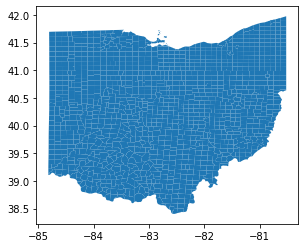

In [36]:
ohio_muni_df.plot()

ohio_muni_df.head()